# Кластеризация

Кластеризация &mdash; это метод машинного обучения, который включает группировку данных в пространстве признаков. Теоретически, точки, находящиеся в одной группе (кластере), должны иметь схожие свойства, в то время как точки в разных группах должны иметь (сильно) отличающиеся свойства.

Кластеризация является методом обучения без учителя и распространенным методом статистического анализа данных, используемым во многих областях. В частности используется при составлении портретов пользователей, поиске аномалий, анализе геоданных, представлении рыночной информации.

В анализе данных часто прибегают к кластеризации, чтобы получить ценную информацию из данных, наблюдая, в какие группы попадают точки при применении алгоритма кластеризации.

## K-means

Алгоритм можно схематически представить в виде следующих шагов:

1. Инициализируем центры кластеров случайным образом (должно быть задано количество кластеров).
2. Относим точки к соответствующим кластерам (с минимальным расстоянием до их центра).
3. Производится пересчет центров кластеров по формуле центра масс для всех точек, принадлежащих кластеру.
4. Пункты 2-3 повторяются до тех пор пока центры кластеров перестанут меняться (сильно).

In [ ]:
# !pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 5.0 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 5.2 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 6.1 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [matplotlib]8 [matplotlib]


In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [25]:
plt.rcParams['figure.figsize'] = [11, 8]

In [26]:
from sklearn.cluster import KMeans

np.random.seed(123)
X1 = np.random.randn(100,2)
X2 = np.random.randn(100,2) - np.array([10,1])
X3 = np.random.randn(100,2) - np.array([1,10])
X = np.vstack((X1,X2,X3))
y = np.array([1]*100 + [2]*100 + [3]*100)

In [29]:
clusters

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,

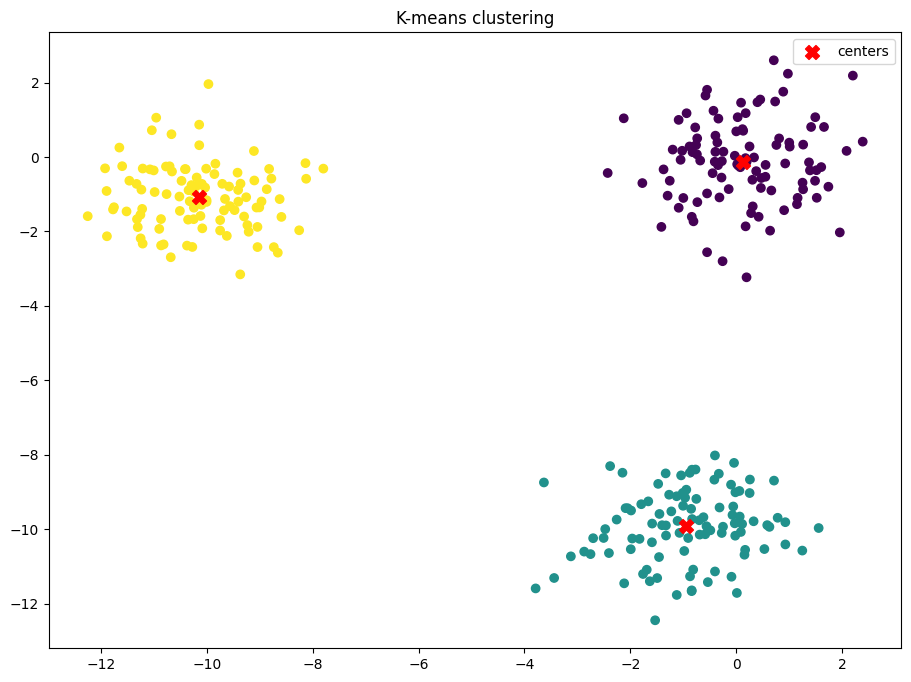

In [33]:
k_means = KMeans(n_clusters = 3)
k_means = k_means.fit(X)
clusters = k_means.predict(X)
plt.scatter(X[:,0], X[:,1], c = clusters)
plt.scatter(
    k_means.cluster_centers_[:, 0],
    k_means.cluster_centers_[:, 1],
    c='red',
    marker='X',
    s=100,
    label='centers'
)
plt.title('K-means clustering')
plt.legend()
plt.show()

Посмотрим, что будет происходить, если мы не угадали с числом кластеров.

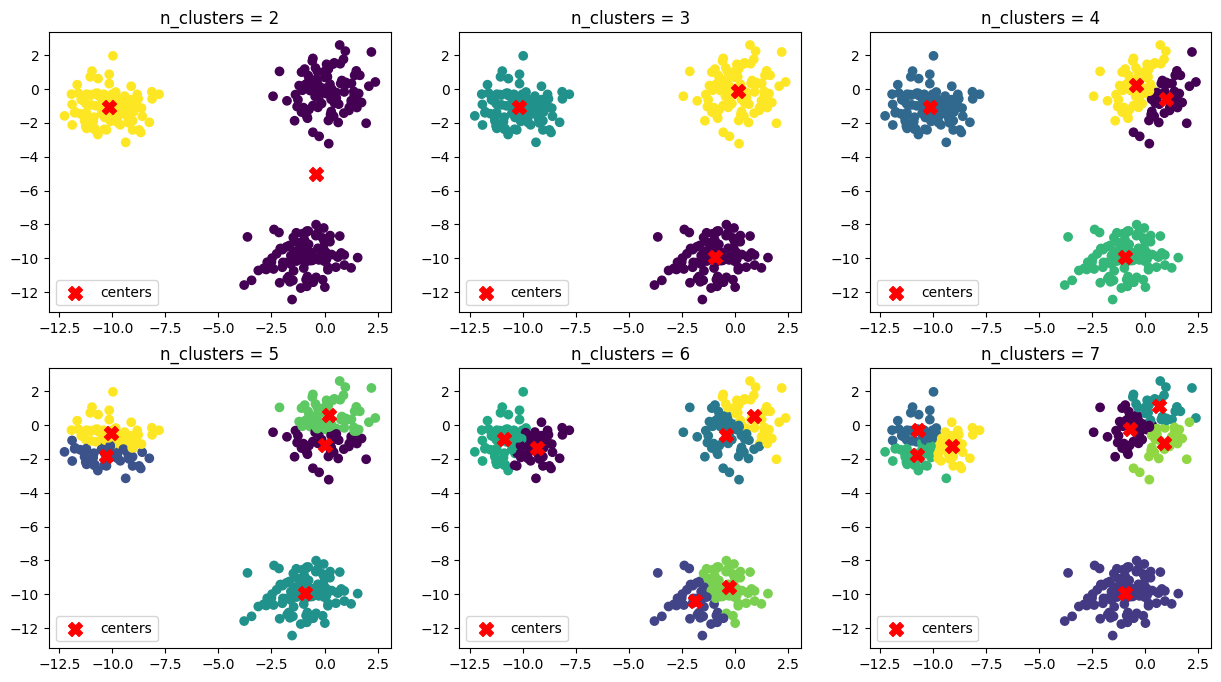

In [36]:
plt.figure(figsize= (15,8))
for n_c in range(2,8):
    k_means = KMeans(n_clusters = n_c)
    k_means = k_means.fit(X)
    clusters = k_means.predict(X)
    plt.subplot(2,3,n_c - 1)
    plt.scatter(X[:,0], X[:,1], c = clusters)
    plt.scatter(
    k_means.cluster_centers_[:, 0],
    k_means.cluster_centers_[:, 1],
    c='red',
    marker='X',
    s=100,
    label='centers'
)
    plt.legend()
    plt.title('n_clusters = {}'.format(n_c))
plt.show()

Как мы видим, k-means обязательно пытается отдать каждому кластеру какие-то объекты и, как большинство алгоритмов кластеризации, зависит от заданного числа кластеров. Есть огромное количество вариаций, как выбирать количество кластеров автоматически — например, ввести вероятностный подход к выбору числа кластеров, но данные методы мы не будем рассматривать.

Одним из главных недостатков k-means является случайная инициализация центров кластеров, что может привести к различным результатам кластеризации.

Главным же достоинством является скорость алгоритма. На каждой итерации требуется пересчет только расстояний до центров кластеров.

Также есть вариация k-medians, которая использует медиану вместо среднего. Это позволяет алгоритму стать более устойчивым к выбросам.

[Визуализация работы K-Means](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

## Оценка качества кластеризации

В случае, когда неизвестны истинные метки классов (внешняя информация), могут быть использованы внутренние меры качества кластеризации, которые оценивают качество структуры кластеров:

* $cohesion(x_i, c_k) = a_i$ — среднее расстояние точки $x_i$ до объектов ее собственного кластера $c_k$ (не считая саму себя). Это компактность «своего» кластера вокруг $x_i$. Чем меньше, тем лучше.
* $separation(x_i, c_k) = b_i$ — среднее расстояние от $x_i$ до объектов ближайшего чужого кластера. Сначала для каждого другого кластера считаем среднее расстояние до его точек, затем берем минимум из этих средних (ближайший кластер в среднем). Чем больше, тем лучше.


Например, **индекс Силуэта** (Silhouette Coefficient):

$$Sil(X, C) = \frac{1}{|C|}\sum_{c_k \in C}\frac{1}{|c_k|}\sum_{x_i \in c_k}\frac{separation(x_i, c_k) - cohension(x_i, c_k)}{max\{separation(x_i, c_k) , cohension(x_i, c_k)\}}$$

где

$separation(x_i, c_k) = min_{c_l \in C ∖ \{c_k\}} \{\frac{1}{|c_l|}\sum_{x_j \in c_l}||x_i - x_j||\}$ - среднее расстояние до объектов ближайшего кластера

$cohension(x_i, c_k) = \frac{1}{|c_k|-1}\sum_{x_j \in c_k}||x_i - x_j||$ - среднее расстояние до объектов того же кластера


$-1 \le Sil(X, C) \le 1$

Чем ближе к 1, тем лучше. Значения около 0 - пересекающиеся кластера. Отрицательные - обычно объектам присовены не те кластеры, так как объекты других кластеров более похожи, чем объекты из одного.

**Силуэт отдельной точки**

$s_i = \frac{b_i − a_i}{max(a_i, b_i)}$
- Если $a_i ≪ b_i$ (точка сильно ближе к своим, чем к чужим), то $s_i → 1$ — отличное размещение.
- Если $a_i ≈ b_i$, то $s_i ≈ 0$ — точка на границе кластеров.
- Если $a_i > b_i$, то $s_i < 0$ — точка, вероятно, попала «не в тот» кластер.

**Силуэт набора данных**

$Sil(X, C)$ = среднее $s_i$ по всем точкам (а также можно усреднять по кластерам). Чем ближе к 1, тем лучше общая кластеризация.

Почему в знаменателе $max(a_i, b_i)$
- Нормировка загоняет показатель в $[−1, 1]$.
- Если $a_i = 0$ (точка совпадает с центром своих соседей), $s_i = 1$.
- Если $a_i = b_i$, $s_i = 0$.
- Знак определяется тем, что больше: «своя» близость $(a_i)$ или близость к ближайшему чужому кластеру $(b_i)$.

**Как посчитать пошагово**

1) Задайте метрику расстояния $d(·,·)$, чаще всего евклидову. Масштаб признаков имеет значение.
2) Для каждой точки $x_i$:
   - $a_i$: среднее $d(x_i, x_j)$ по $j$ из ее кластера $(j ≠ i)$. Если в кластере один объект, по соглашению $s_i = 0$.
   - Для каждого другого кластера $c_l$ вычислите среднее расстояние от $x_i$ до точек $c_l$. Возьмите минимум — это $b_i$.
   - $s_i = \frac{b_i − a_i}{max(a_i, b_i)}$.
3) Усредните $s_i$ по всем $i$ — получите $Sil(X, C)$.

**Интерпретация ориентировочно**

- $s_i > 0.5$ — хорошо размещена.
- $0.2–0.5$ — приемлемо/на границе.
- $< 0.2$ — слабое разделение.
- $< 0$ — вероятная ошибка присвоения.
- Среднее Sil по данным: чем выше, тем лучше; часто выбирают число кластеров k, максимизируя средний Sil.

**Замечания и ограничения**

- Работает с любой метрикой, но чувствителен к выбору расстояния и масштабированию признаков.
- Предполагает «компактные» кластеры; для сильно вытянутых/перекрывающихся или разной плотности показатель может быть вводящим в заблуждение.
- Полная вычислительная сложность $O(n^2)$ по числу точек (из‑за попарных расстояний); для больших выборок берут подвыборку или используют приближения.

**Мини‑пример**

* Пусть для точки $a_i = 1.2$ — среднее расстояние этой точки до остальных точек из своего кластера.
* Cреднее до чужих кластеров: до B — 3.8, до C — 2.5. 
* Тогда $b_i = min(B, C) = min(3.8, 2.5) = 2.5$
* $s_i = \frac{2.5 − 1.2}{max(2.5, 1.2)} = \frac{1.3}{2.5} = 0.52$ — точка неплохо вписана в свой кластер.

In [8]:
from sklearn.metrics import silhouette_score

best_k, best_score = None, -1
for k in range(2,15):
    k_means = KMeans(n_clusters = k)
    k_means = k_means.fit(X)
    clusters = k_means.predict(X)
    score = np.round(silhouette_score(X=X,
                             labels=clusters), 2)
    if score > best_score:
      best_score = score
      best_k = k
print('Best score {}, k = {}'.format(best_score, best_k))

Best score 0.82, k = 3


## Методы подбора оптимального числа кластеров

### 1. Метод локтя (elbow method)

**Смысл:** cравним внутрикластерную сумму квадратов ошибок (`inertia_`) для разных значений числа кластеров, ищем "излом" графика — дальше возрастание количества кластеров перестаёт существенно уменьшать ошибку.

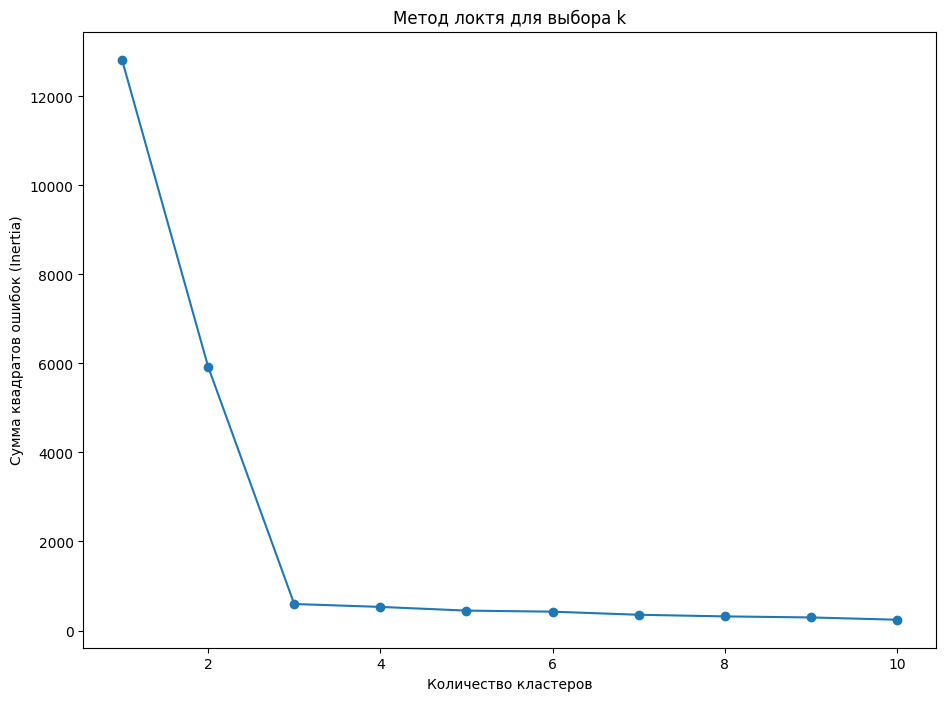

In [37]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertias = []
max_k = 10 
for k in range(1, max_k+1):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, max_k+1), inertias, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов ошибок (Inertia)')
plt.title('Метод локтя для выбора k')
plt.show()

### 2. Коэффициент силуэта (silhouette score)

**Смысл:** Показывает, насколько "правильные" кластеры: 
- значения ближе к 1 — хорошо
- ближе к 0 — пересекаются

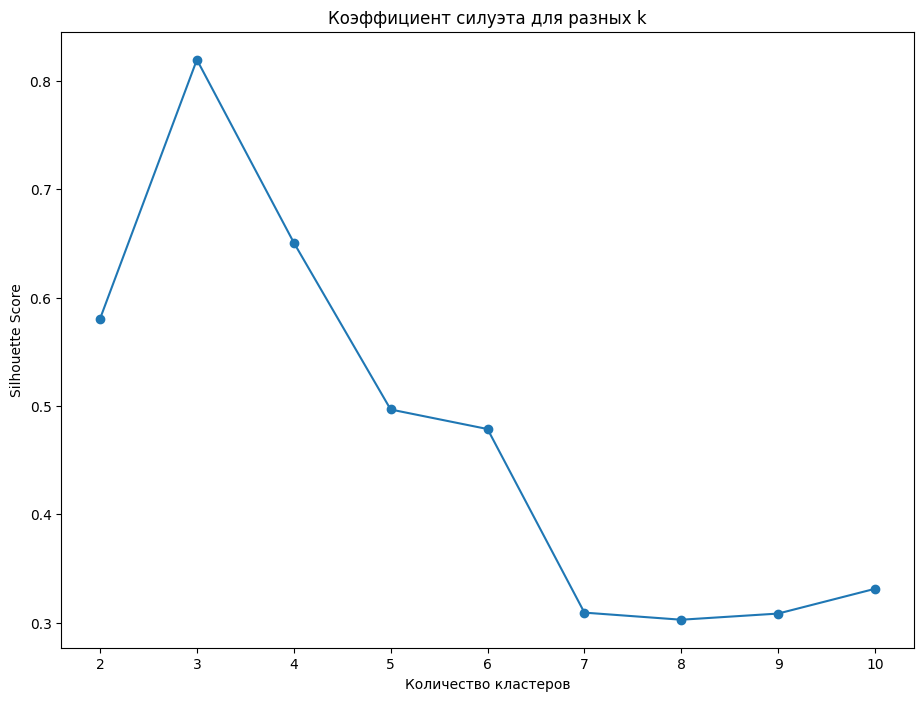

In [38]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, max_k+1):  # silhouette_score не определён для k=1!
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    labels = kmeans.labels_
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.plot(range(2, max_k+1), silhouette_scores, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Silhouette Score')
plt.title('Коэффициент силуэта для разных k')
plt.show()

### 3. Визуализация кластеров

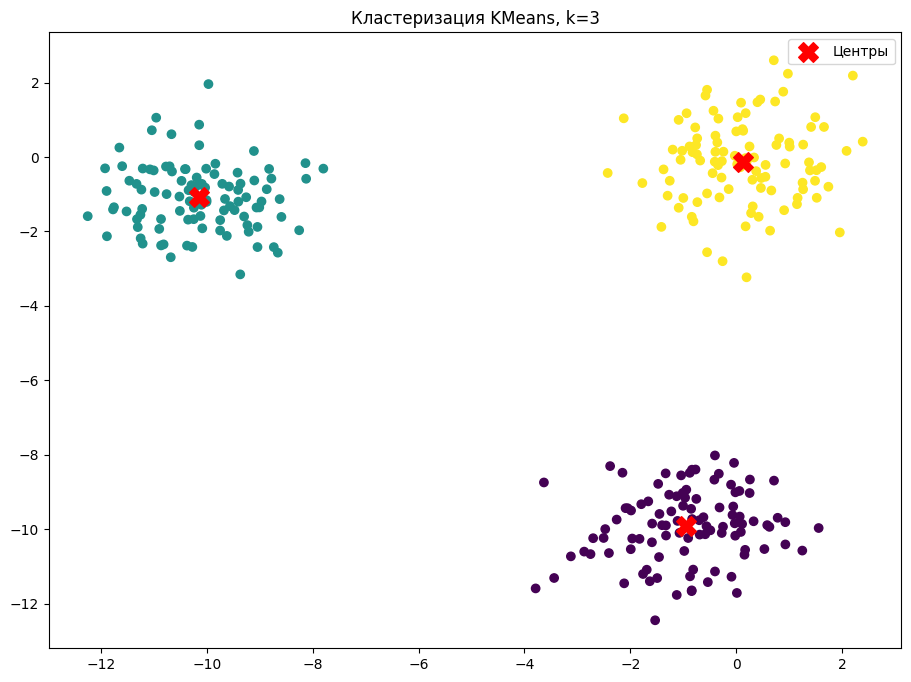

In [39]:
optimal_k = 3  # выберите оптимальное k по графикам выше

kmeans = KMeans(n_clusters=optimal_k).fit(X)
clusters = kmeans.labels_

plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Центры')
plt.title(f'Кластеризация KMeans, k={optimal_k}')
plt.legend()
plt.show()

### Индекс Калински-Харабаза (Calinski-Harabasz index)

Является еще одним способом оценки качества кластеризации, но менее универсален и информативен, чем индекс Силуета, поэтому не буду на нем детально останавливаться.

**Суть индекса:**
 Он измеряет, насколько хорошо разделены полученные кластеры и насколько они компактны.  
 
 **Высокое** значение индекса говорит о том, что: 
 - объекты **близки** к центру своего кластера (высокая "компактность"), 
 - центры кластеров **далеки друг от друга** (кластеры хорошо разделены).  
 
 Чем выше Calinski-Harabasz Index, тем лучше качество кластеризации.  
 
**Математическая формула:**
$$ CH = \frac{\frac{D_{межкластерная}}{k-1}}{\frac{D_{внутрикластерная}}{n-k}} $$

где
- $D_{межкластерная}$ - межкластерная дисперсия
- $D_{внутрикластерная}$ - внутрикластерная дисперсия
- $k$ - число кластеров
- $n$ - количество объектов

*CH*: Отлично показывает, насколько кластеры обособлены (большое расстояние между центрами кластеров) при заданном числе кластеров. Но не говорит ничего про форму кластеров и чувствителен к неравномерному размеру.

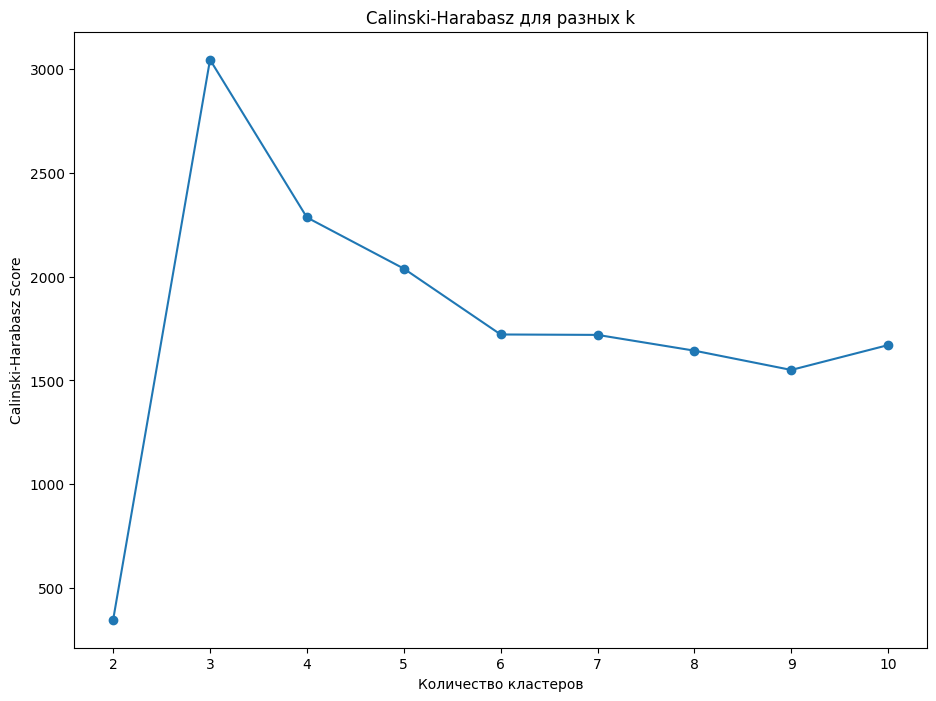

In [40]:
from sklearn.metrics import calinski_harabasz_score

ch_scores = []
for k in range(2, max_k+1):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    ch = calinski_harabasz_score(X, kmeans.labels_)
    ch_scores.append(ch)

plt.plot(range(2, max_k+1), ch_scores, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz для разных k')
plt.show()

# DBSCAN

(Density-based spatial clustering of applications with noise)

Это алгоритм, основанный на плотности — если дан набор объектов в некотором пространстве, алгоритм группирует вместе объекты, которые расположены близко и помечает как выбросы (шум) объекты, которые находятся в областях с малой плотностью (ближайшие соседи которых лежат далеко).

Алгоритм имеет два основных гиперпараметра:
1. `eps` &mdash; радиус рассматриваемой окрестности
2. `min_samples` &mdash; число соседей в окрестности

Для выполнения кластеризации DBSCAN точки делятся на основные точки, достижимые по плотности точки и выпадающие следующим образом:

- Точка $p$ является основной точкой, если по меньшей мере `min_samples` точек находятся на расстоянии, не превосходящем
`eps` от неё. Говорят, что эти точки достижимы прямо из $p$.

-  Точка $q$ прямо достижима из $p$, если точка $q$ находится на расстоянии, не большем `eps`, от точки $p$, и $p$ — основная точка.
Точка $q$ достижима из $p$, если имеется путь
$p_1,…,p_n$ где $p_1=p$ и $p_n=q$ , а каждая точка $p_{i+1}$ достижима прямо из $p_i$ (все точки на пути должны быть основными, за исключением $q$).

Все точки, не достижимые из основных точек, считаются шумом.

Теперь, если $p$ является основной точкой, то она формирует кластер вместе со всеми точками (основными или неосновными), достижимыми из этой точки. Каждый кластер содержит по меньшей мере одну основную точку. Неосновные точки могут быть частью кластера, но они формируют его «край», поскольку не могут быть использованы для достижения других точек.



Рассмотрим диаграмму, параметр `min_samples`=4.

Точка $A$ и другие красные точки являются основными точками, поскольку область с радиусом
`eps` , окружающая эти точки, содержит по меньшей мере 4 точки (включая саму точку). Поскольку все они достижимы друг из друга, точки образуют один кластер. Точки $B$ и $C$ основными не являются, но достижимы из $A$ (через другие основные точки), и также принадлежат кластеру. Точка $N$ является точкой шума, она не является ни основной точкой, ни доступной прямо.

<p><a href="https://commons.wikimedia.org/wiki/File:DBSCAN-Illustration.svg#/media/Файл:DBSCAN-Illustration.svg"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/1200px-DBSCAN-Illustration.svg.png" alt="DBSCAN-Illustration.svg" width="450" height="450"> </a><br>Автор: <a href="//commons.wikimedia.org/wiki/User:Chire" title="User:Chire">Chire</a> &mdash; <span class="int-own-work" lang="ru">собственная работа</span>, <a href="https://creativecommons.org/licenses/by-sa/3.0" title="Creative Commons Attribution-Share Alike 3.0">CC BY-SA 3.0</a>

Посмотрим на результаты кластеризации при разном выборе параметров `eps` и `min_samples`.

Шумовые точки помечаются -1

In [9]:
clusters

array([13, 10, 13,  9,  2,  9, 12,  9,  5, 12,  5, 13,  9,  2,  2, 10,  9,
        2, 13,  9, 10, 13,  2, 12,  5,  9, 12, 13,  5, 12, 13,  2, 12,  2,
        9,  2,  2, 13,  9, 10,  2, 12, 10, 10, 12,  2, 13, 13, 10,  2, 10,
        5,  9, 10, 10, 13, 13, 12,  9,  2,  9, 13, 12, 12,  2,  9,  9, 12,
       13, 12,  9, 12,  2,  5,  9,  2, 10,  9,  2, 12,  2, 13,  2,  2,  2,
        9,  9,  5,  2,  9, 13, 12, 10,  9, 13,  2,  2, 10,  9,  9,  3,  3,
        7, 11,  7,  7, 11,  0,  3,  7, 11,  7,  3, 11,  0,  0,  7,  3,  3,
        3,  7,  3,  3,  3,  0,  3, 11,  3,  7,  0,  7,  7,  3,  7,  3, 11,
        3, 11,  3, 11, 11, 11, 11,  0,  0,  0,  3,  0,  3,  7,  3,  0,  0,
        0,  7,  3,  0,  3, 11,  7, 11, 11,  3, 11,  7,  0,  7,  7,  7,  3,
       11,  3,  0,  7,  0,  7, 11, 11,  0, 11,  7,  7,  0,  3,  7, 11,  3,
        0,  7,  3,  3, 11,  7,  0,  3,  7,  7, 11,  7,  7,  4,  8,  1,  6,
        1,  4,  1,  8,  4,  8,  1,  8,  8,  1,  1,  1,  8,  4,  8,  4,  4,
        1,  4,  6,  4,  8

Кластеризация методом DBSCAN с разными параметрами `eps` и `min_samples`

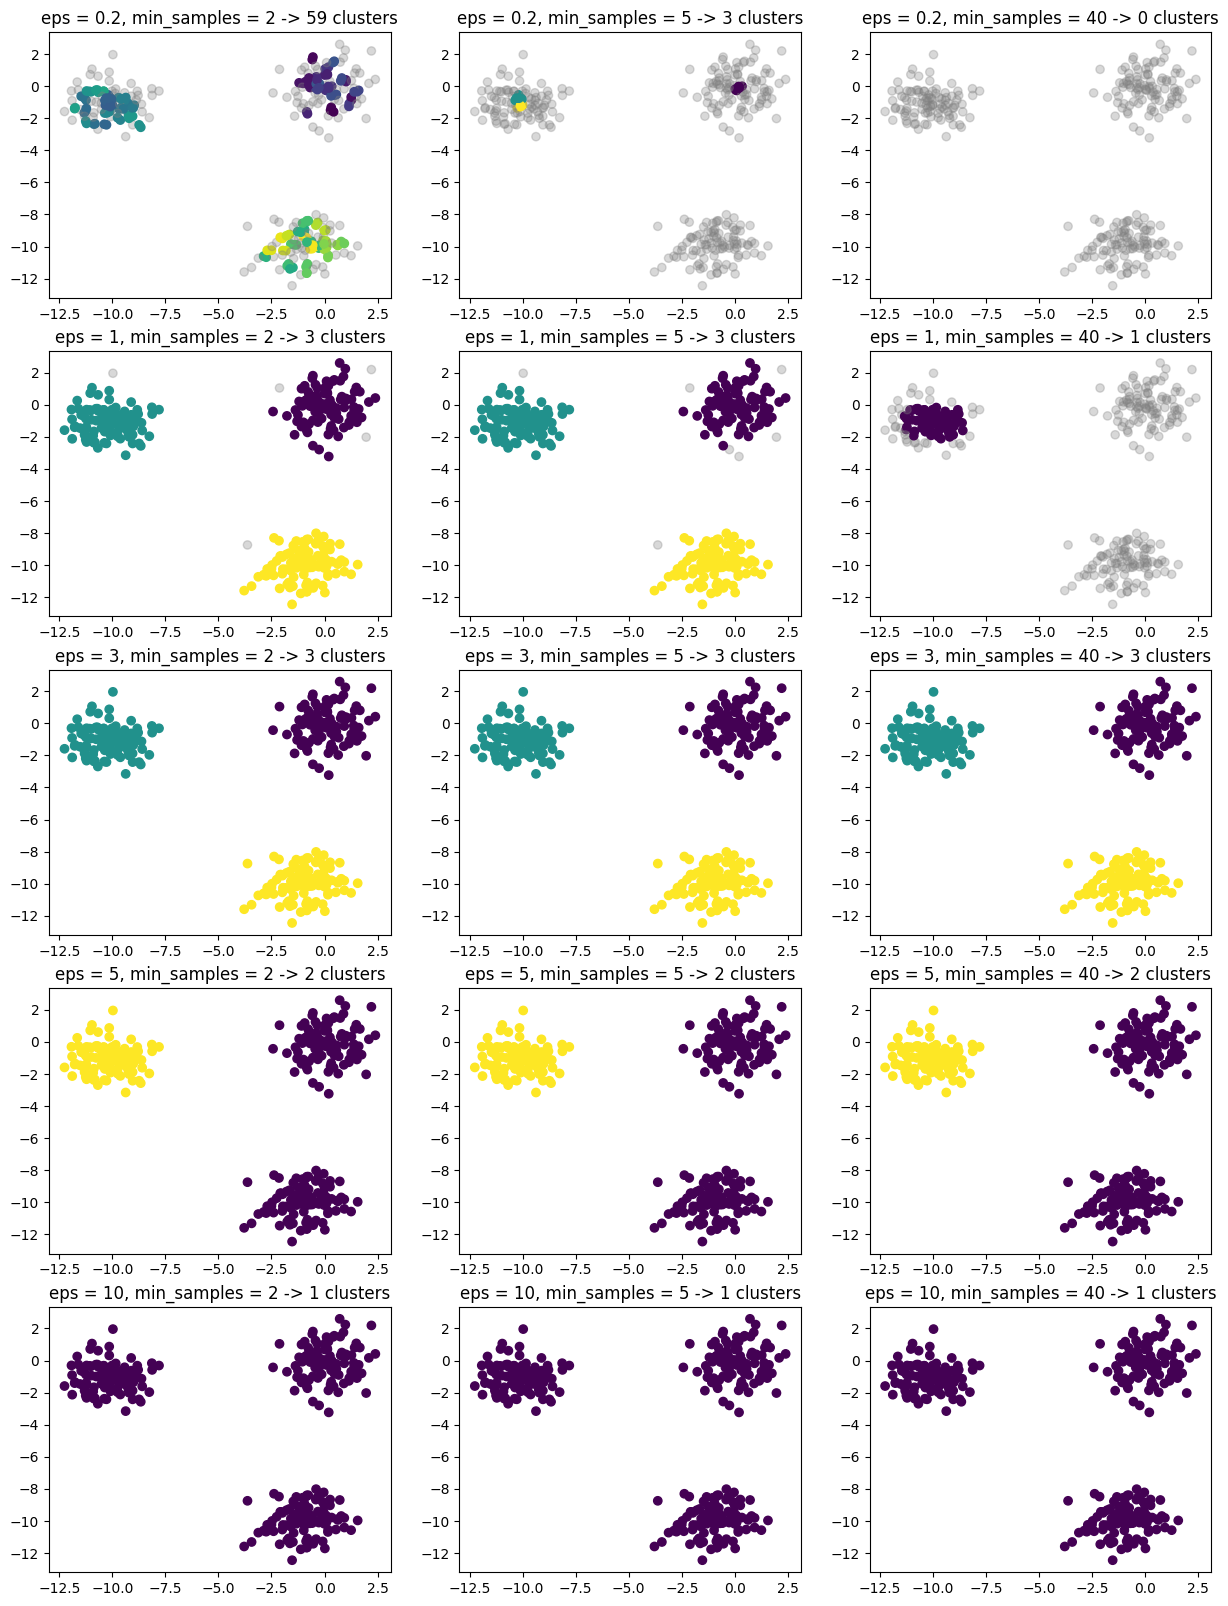

In [10]:
from sklearn.cluster import DBSCAN
import matplotlib as mpl

def get_colors(clusters):
  n_clusters = len(np.unique(clusters[clusters != -1]))

  palette = mpl.colormaps['viridis'].resampled(n_clusters)(np.linspace(0, 1, n_clusters))
  colors = np.zeros((clusters.shape[0], 4))
  colors[clusters != -1] = palette[clusters[clusters != -1]]

  #Шум будет серо-прозрачным
  colors[clusters == -1] = [0.5, 0.5, 0.5, 0.3]

  return colors

plt.figure(figsize= (15,20))
i = 1

for e in [0.2, 1, 3, 5, 10]:
    for samples in [2, 5, 40]:
        dbscan = DBSCAN(eps=e, min_samples=samples)
        clusters = dbscan.fit_predict(X)

        n_clusters = len(np.unique(clusters[clusters != -1]))
        colors = get_colors(clusters)

        plt.subplot(5, 3, i)

        plt.scatter(X[:,0], X[:,1], c=colors)
        plt.title('eps = {}, min_samples = {} -> {} clusters'.format(e, samples, n_clusters))
        i += 1


plt.show()

[Визуализация работы DBSCAN](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/)
(Стоит посмотреть)

Результаты работы методов на других датасетах:

Пример 1

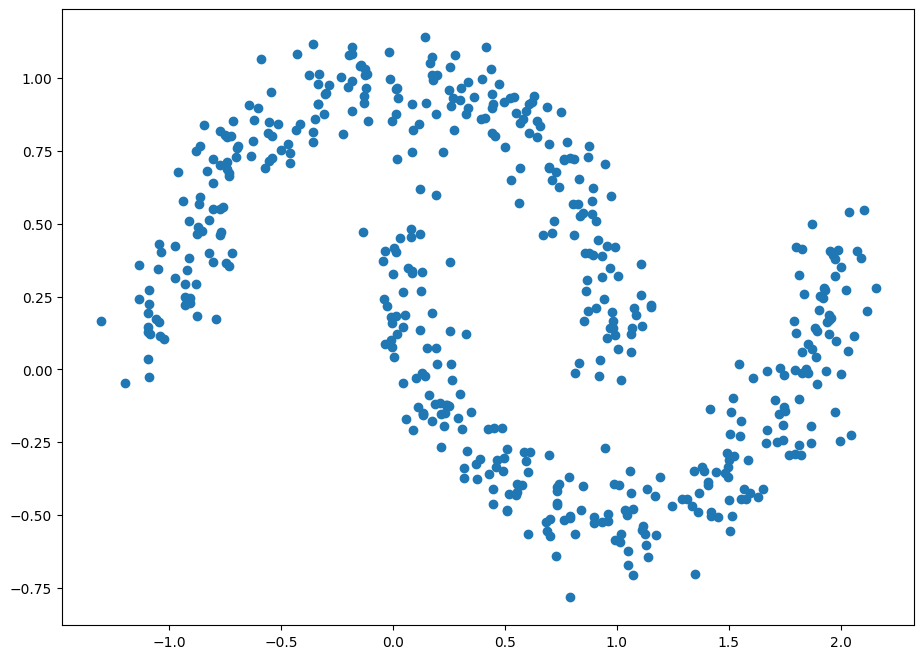

In [41]:
from sklearn.datasets import make_moons, make_circles

X, y = make_moons(n_samples=500, noise=0.1)
plt.scatter(X[:,0], X[:,1])
plt.show()

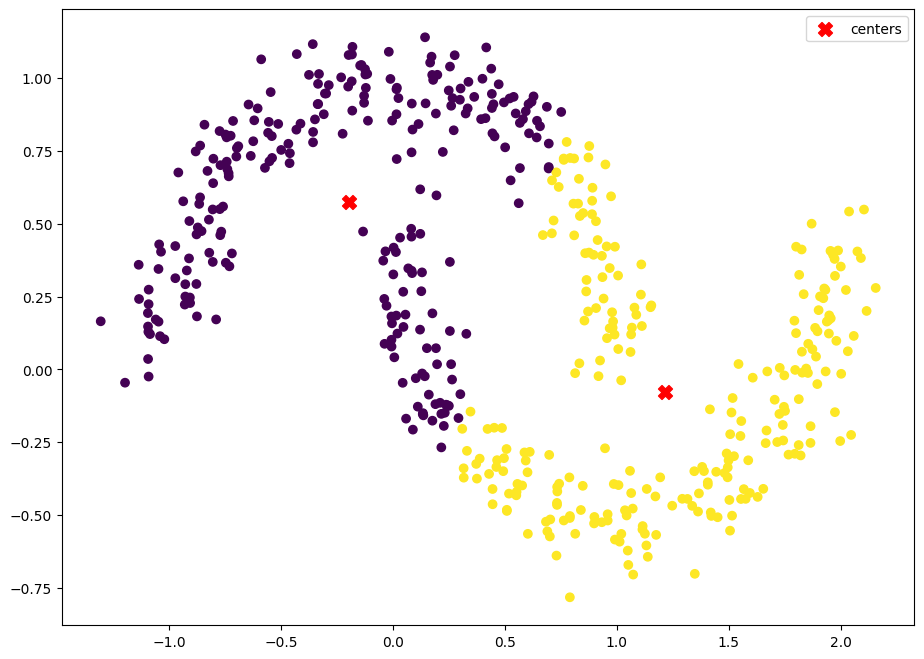

In [44]:
k_means = KMeans(n_clusters = 2)
k_means = k_means.fit(X)
clusters = k_means.predict(X)

colors = get_colors(clusters)
plt.scatter(X[:,0], X[:,1], c=colors)
plt.scatter(
    k_means.cluster_centers_[:, 0],
    k_means.cluster_centers_[:, 1],
    c='red',
    marker='X',
    s=100,
    label='centers'
)
plt.legend()
plt.show()

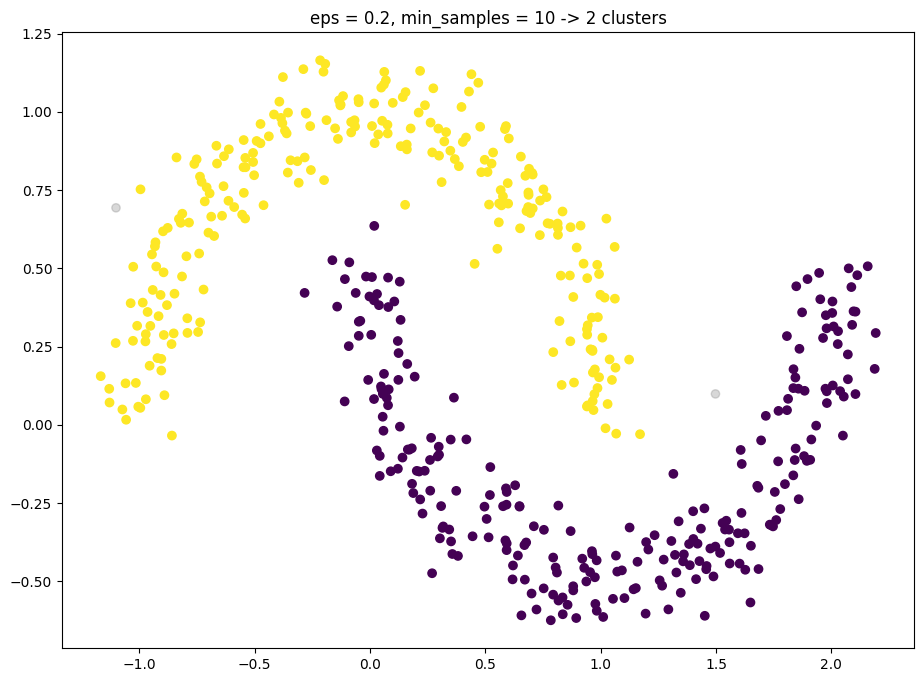

In [13]:
dbscan = DBSCAN(eps=0.2, min_samples=10)
clusters = dbscan.fit_predict(X)

colors = get_colors(clusters)
plt.scatter(X[:,0], X[:,1], c=colors)
plt.title('eps = {}, min_samples = {} -> {} clusters'.format(dbscan.eps, dbscan.min_samples, len(np.unique(clusters[clusters != -1]))))
plt.show()

Пример 2

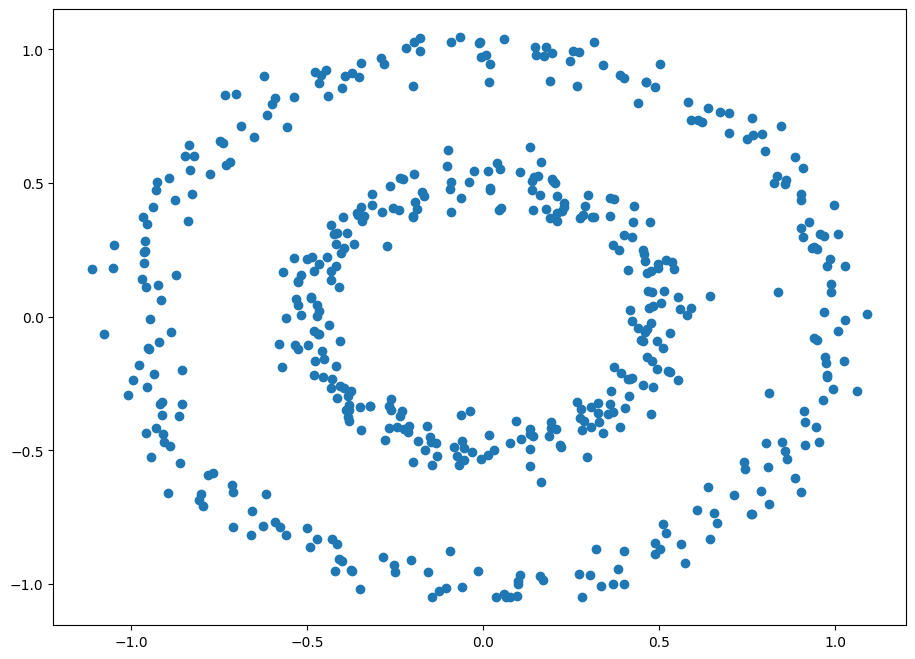

In [45]:
X, y = make_circles(n_samples=500, noise=0.05, factor=0.5)
plt.scatter(X[:,0], X[:,1])
plt.show()

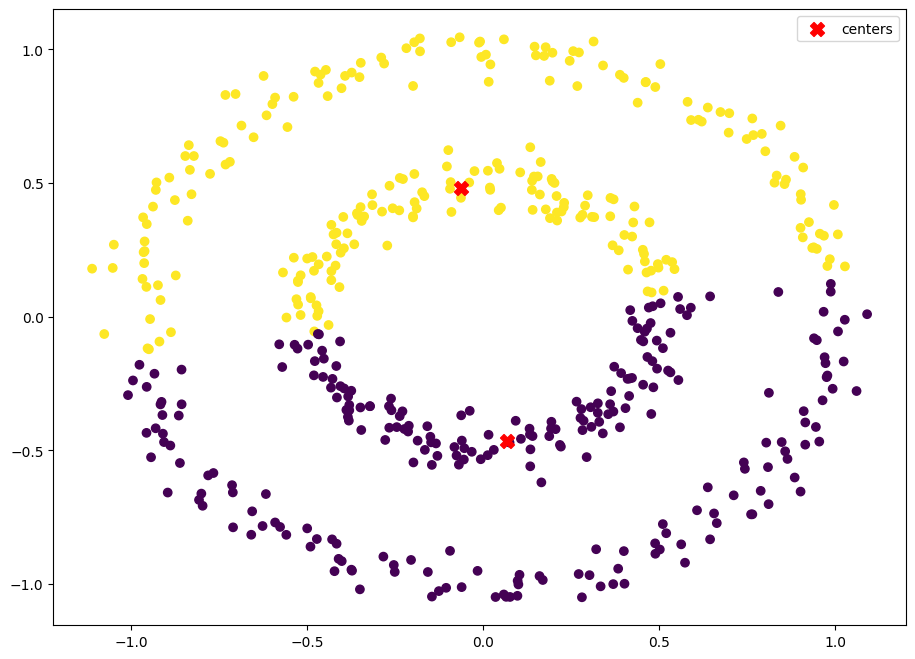

In [46]:
k_means = KMeans(n_clusters = 2)
k_means = k_means.fit(X)
clusters = k_means.predict(X)
plt.scatter(X[:,0], X[:,1], c=clusters)
plt.scatter(
    k_means.cluster_centers_[:, 0],
    k_means.cluster_centers_[:, 1],
    c='red',
    marker='X',
    s=100,
    label='centers'
)
plt.legend()
plt.show()

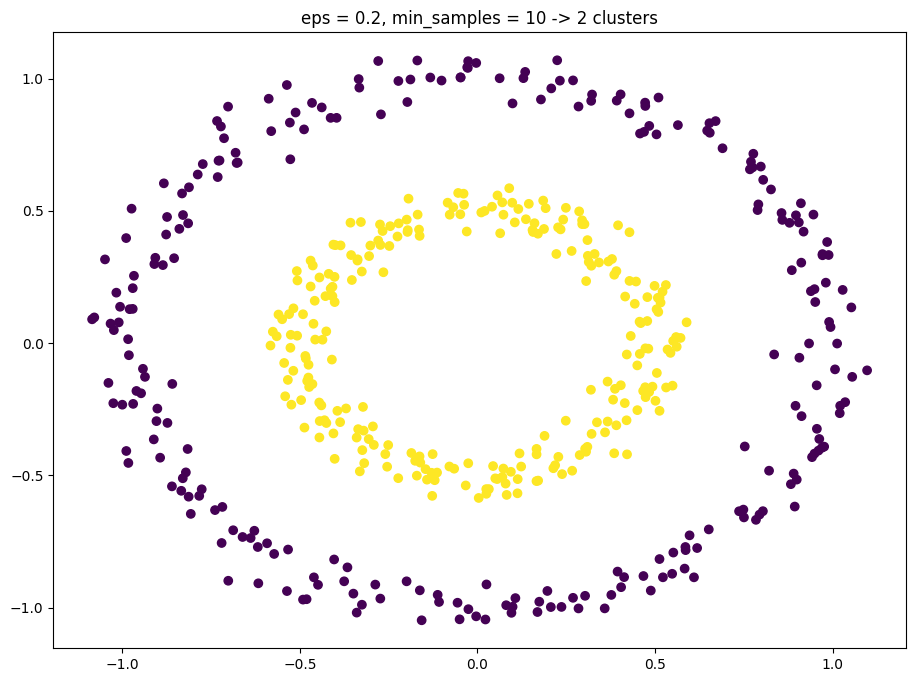

In [16]:
dbscan = DBSCAN(eps=0.2, min_samples=10)
clusters = dbscan.fit_predict(X)
colors = get_colors(clusters)
plt.scatter(X[:,0], X[:,1], c=colors)
plt.title('eps = {}, min_samples = {} -> {} clusters'.format(dbscan.eps, dbscan.min_samples, len(np.unique(clusters[clusters != -1]))))
plt.show()

k-Means выделяет только выпуклые кластеры, сходного размера. Не очень хорошо работает с шумными данными. Хуже видит аномалии. С другой стороны, k-means лучше справляется с большими данными и размерностью, а также разреженными данными с переменной плотностью (DBSCAN скорее относит разные плотности к разным кластерам).

# Иерархическая кластеризация

Другим вариантом к построению кластеров является иерархический подход, в котором алгоритм жадным образом строит кластеры. Существует два варианта иерархической кластеризации:

1. аггломеративная, в которой алгоритм на каждой итерации объединяет два меньших кластера в один
2. дивизивная, в которой алгоритм на каждой итерации разбивает один кластер на два более мелких

Мы рассмотрим аггломеративный подход к кластеризации (дивизивный можно рассмотреть по аналогии).

Опишем схематически алгоритм аггломеративной иерархической кластеризации:

- Инициализируем наше множество кластеров, каждая точка считается своим кластером. То есть для выборки размера $N$ у нас на первой итерации будет $N$ кластеров. Также в качестве входного параметра алгоритму подается метрика расстояния между двумя кластерами. Одной из популярных метрик является расстояние Уорда.

- На каждой итерации  мы объединяем два кластера в один. Объединяющиеся кластера выбираются в соответствии с наименьшим расстоянием Уорда. То есть в соответствии с выбранным нами расстоянием эти два кластера будут наиболее похожи и поэтому объединяются.

- Предыдущий шаг повторяется вплоть до объединения всех точек один кластер.

Расстояние Уорда — между кластерами берётся прирост суммы квадратов расстояний объектов до центра кластера, получаемого в результате их объединения.

$$
\Delta = \sum_{x_i \in A \cup B}{(x_i-\bar{x})^2} - \sum_{x_i \in A}(x_i - \bar{a})^2 - \sum_{x_i \in B}(x_i - \bar{b})^2
$$

В результате в данном подходе мы можем выбрать любое количество кластеров после завершения процедуры, просто остановив алгоритм на нужном нам шаге. К тому же данный алгоритм гораздо менее чувствителен к выбору метрики между точками, тогда как другие алгоритмы сильно зависят от этого.

Для визуализации иерархической кластеризации удобно строить дендрограммы, в которых разница между уровнями равна выбранному расстоянию объединяющихся на данном этапе кластеров.

Посмотрим на иерархическую кластеризацию на примере:


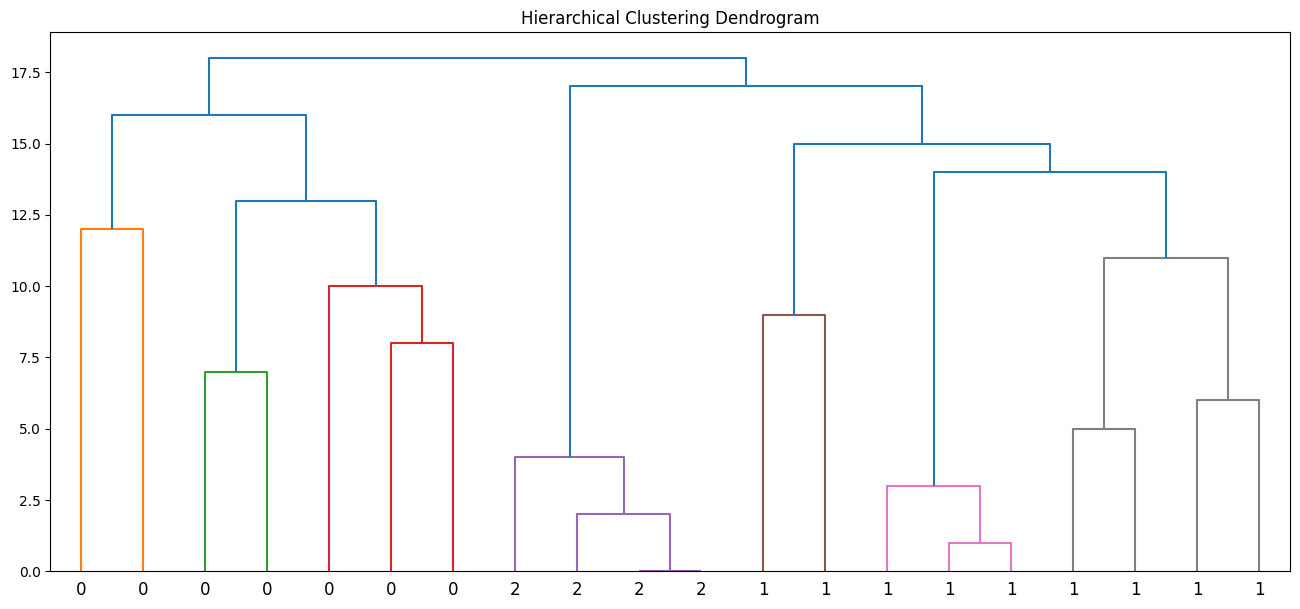

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    # linkage matrix format: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data[:20]
model = AgglomerativeClustering(n_clusters=3)

model = model.fit(X)
plt.figure(figsize=(16,7))
plot_dendrogram(model, labels=model.labels_)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

Если нет каких-то специализированных условий (например, известно, что кластеров должно быть не более $K$), то число кластеров можно выбирать по резкому скачку дендрограммы. Кроме того, в некоторых задачах важно понимать, для чего делается кластеризация и доменную область задачи — исходя из этого можно сильно сократить искомое количество кластеров.

Также в иерархическую кластеризацию можно передавать дополнительную информацию вида *I-я и J-я точки "похожи"*. Это задается через матрицу связей.

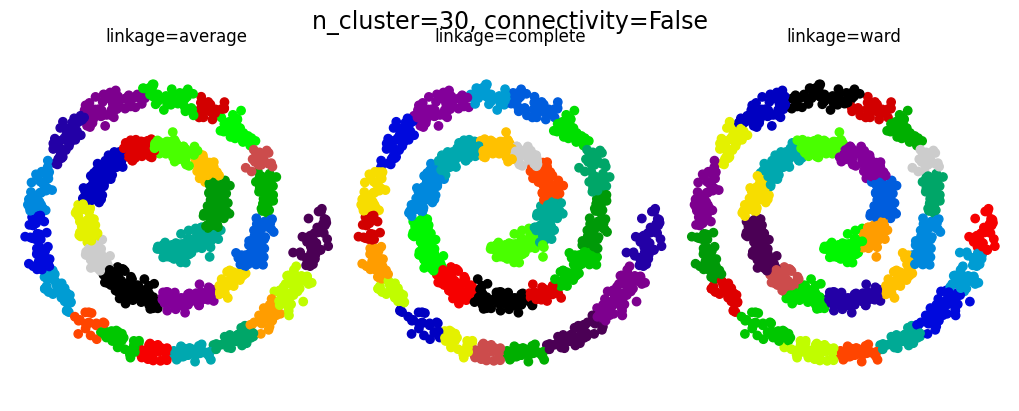

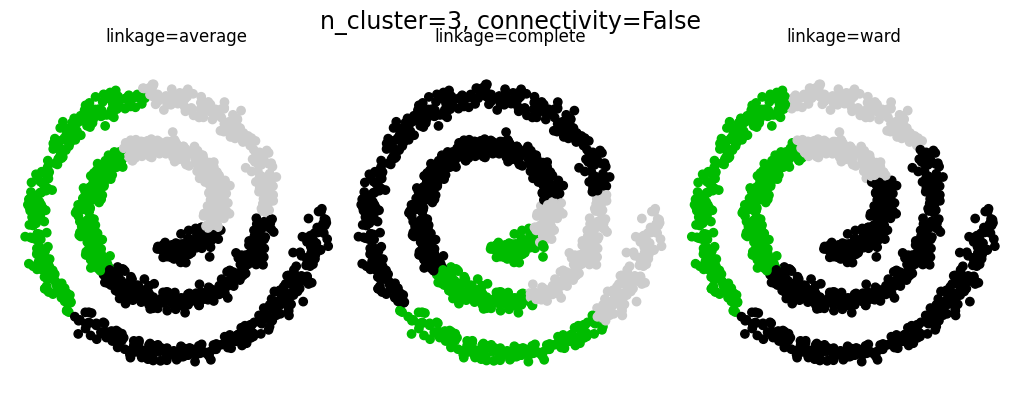

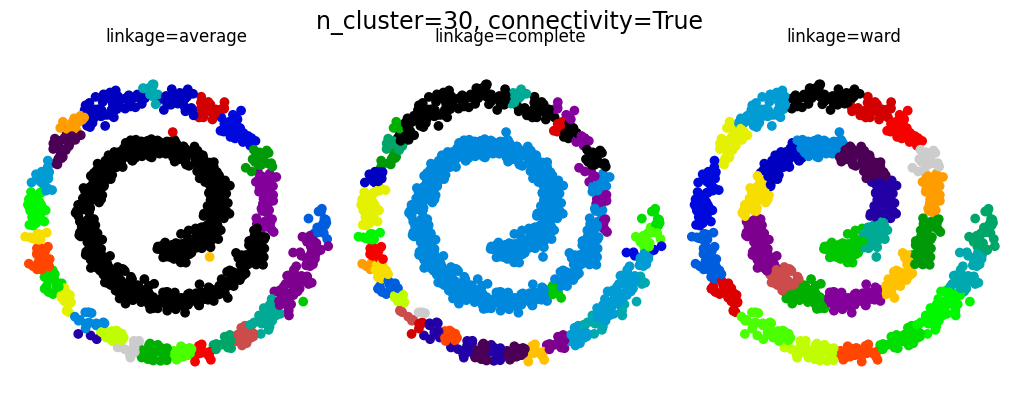

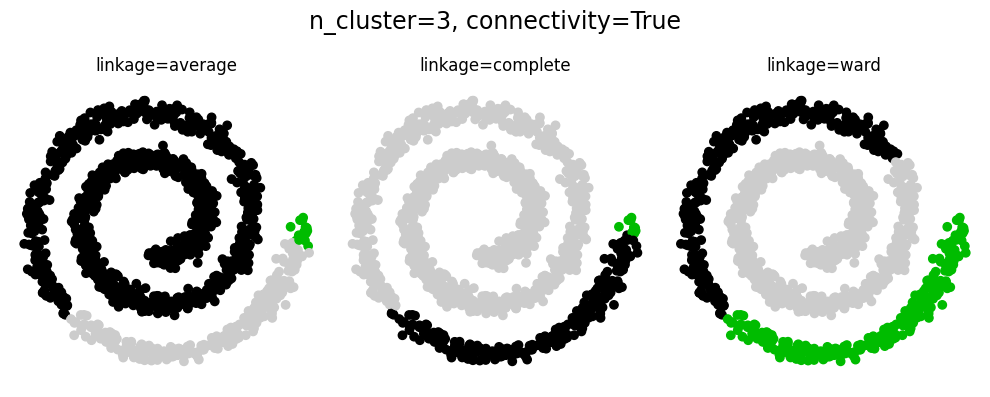

In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

# Сгенерируем выборку
n_samples = 1500
np.random.seed(0)
t = 1.5 * np.pi * (1 + 3 * np.random.rand(1, n_samples))
x = t * np.cos(t)
y = t * np.sin(t)


X = np.concatenate((x, y))
X += .7 * np.random.randn(2, n_samples)
X = X.T

# Создайте граф, отражающий локальную связность. 
# Большее количество соседей обеспечит более однородные кластеры по стоимости вычислений времени.
# Очень большое количество соседей обеспечивает более равномерное распределение
# размеров кластеров, но может не диктовать структуру локального многообразия данных
knn_graph = kneighbors_graph(X, 30, include_self=False)

for connectivity in (None, knn_graph):
    for n_clusters in (30, 3):
        plt.figure(figsize=(10, 4))
        for index, linkage in enumerate(('average',
                                         'complete',
                                         'ward')):
            plt.subplot(1, 3, index + 1)
            model = AgglomerativeClustering(linkage=linkage,
                                            connectivity=connectivity,
                                            n_clusters=n_clusters)
            model.fit(X)
            plt.scatter(X[:, 0], X[:, 1], c=model.labels_,
                        cmap=plt.cm.nipy_spectral)
            plt.title('linkage=%s' % linkage,
                      fontdict=dict(verticalalignment='top'))
            plt.axis('equal')
            plt.axis('off')

            plt.subplots_adjust(bottom=0, top=.89, wspace=0,
                                left=0, right=1)
            plt.suptitle('n_cluster=%i, connectivity=%r' %
                         (n_clusters, connectivity is not None), size=17)

plt.tight_layout()
plt.show()



Пояснения:

linkage - метрика расстояния между кластерами:


*   ‘ward’ расстояние Уорда
*   ‘average’ - среднее расстояние между всеми объектами двух кластеров
*   ‘complete’ - максимальное расстояние между всеми объектами двух кластеров


connectivity - матрица связей (или что-то, из чего ее можно получить):

*  False в названии графика - None  (никакая структура не учитывается)
*  True в названии графика - kneighbors_graph

# Сравнение работы алгоритмов

Сгенерируем кластеры разной формы и посмотрим на результаты работы алгоритмов

Automatically created module for IPython interactive environment


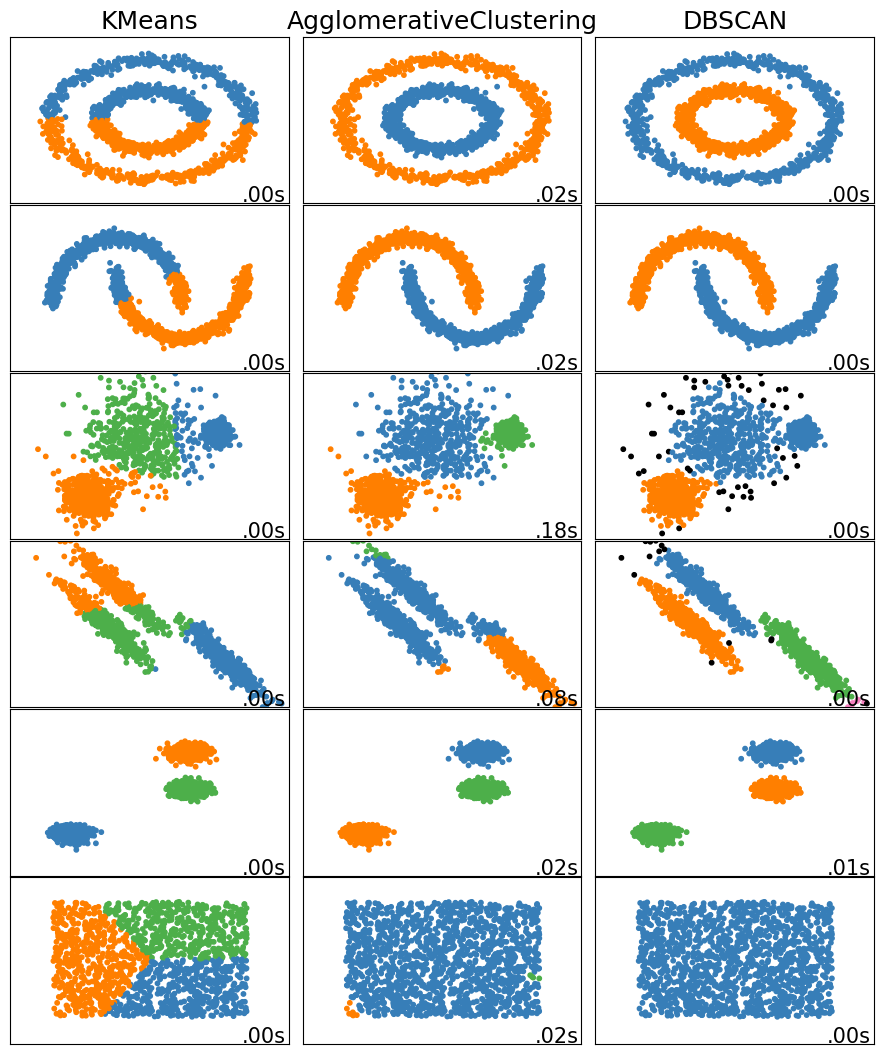

In [19]:
print(__doc__)

import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
warnings.simplefilter('ignore')

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(3 * 2 + 3, 10.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2,
                     'min_samples': 20, 'xi': 0.25}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2,
              'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
    (aniso, {'eps': .15, 'n_neighbors': 2,
             'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)

    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============

    k_means = cluster.KMeans(n_clusters=params['n_clusters'])


    dbscan = cluster.DBSCAN(eps=params['eps'])

    average_linkage = AgglomerativeClustering(
        linkage="average",
        metric="cityblock",  # раньше было affinity="cityblock"
        n_clusters=params['n_clusters'],
        connectivity=connectivity
    )


    clustering_algorithms = (
        ('KMeans', k_means),
        ('AgglomerativeClustering', average_linkage),
        ('DBSCAN', dbscan),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()